In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


from joblib import parallel_backend
from sklearn.utils.class_weight import compute_class_weight


#parallel
import joblib
from joblib import parallel_backend
from joblib import Parallel, delayed
import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale
from dask import delayed

In [2]:
#import data

comb_dinuc_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/rubyRF/UR_GP/GPUR_train/data_sets/URGP_train_set2_di_df.txt',header=0,sep='\t')


np.shape(comb_dinuc_df)


shuf_comb_dinuc_df=comb_dinuc_df.iloc[np.random.permutation(len(comb_dinuc_df))]


#shuffle and reset index
shuf_comb_dinuc_df=shuf_comb_dinuc_df.reset_index(drop=True)



In [3]:
ydt=shuf_comb_dinuc_df['ptype']
xdt=shuf_comb_dinuc_df.drop(['seq_id','ptype'],axis=1)


In [4]:
######################### split data #####################################

#split test train data
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=256)


Xdt_train.shape, Xdt_test.shape



((1005031, 21), (251258, 21))

In [5]:
with parallel_backend('threading',n_jobs=48 ):


    #print('traing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # Calculate class weights
    #class_weights = compute_class_weight('balanced', classes=np.unique(ydt_train), y=ydt_train)
    #class_weights

    rfc_gpur = RandomForestClassifier(random_state=231,n_estimators = 250,n_jobs=32)
    #class_weight=dict(enumerate(class_weights) ))




#    rfc_dicomb = RandomForestClassifier(random_state=3500,n_estimators = 400,n_jobs=32,
#     class_weight=dict(enumerate(class_weights) ),
#     criterion='log_loss',
#        max_depth=100,
#        min_samples_split=10,
#        min_samples_leaf=2,
#        max_features='log2',
#        bootstrap=True
#        )


    print('training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    #model train
    rfc_gpur.fit(Xdt_train, ydt_train)


    # Predict the Test set results

    y_pred =  rfc_gpur.predict(Xdt_test)

training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [6]:
# test accuracy score 


print('Model test accuracy : {0:0.4f}'. format(accuracy_score(ydt_test, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt_test,y_pred)))

Model test accuracy : 0.8516

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.93      0.87    137159
           1       0.90      0.75      0.82    114099

    accuracy                           0.85    251258
   macro avg       0.86      0.84      0.85    251258
weighted avg       0.86      0.85      0.85    251258



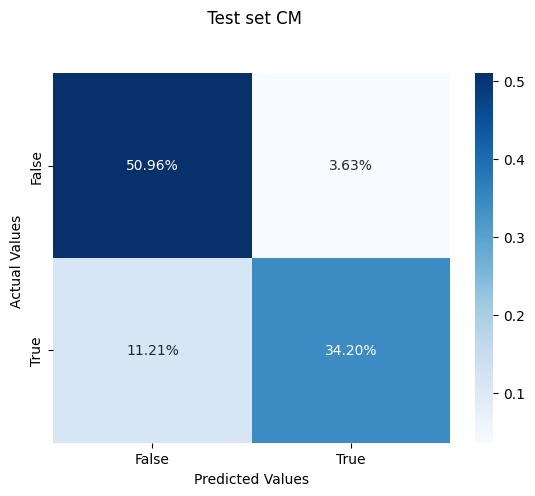

In [7]:
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt_test, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()


fig1.savefig("RFC_GPUR_cm_tr_set2_v1.pdf")

In [7]:
#svae the rfc model
mfilename='/shares/kslotkin_share/private/tratnayake/rubyRF/UR_GP/GPUR_models/rfc_GPUR_set2_NWG_v2_nochange.pkl'

pickle.dump( rfc_gpur,open(mfilename,'wb'))

In [8]:
client = Client(processes=False, threads_per_worker=1, n_workers=48, memory_limit='256GB')

distributed.scheduler:INFO: State start
distributed.scheduler:INFO:   Scheduler at: inproc://10.5.1.61/64524/1
distributed.scheduler:INFO:   dashboard at:  http://10.5.1.61:8787/status
distributed.scheduler:INFO: Registering Worker plugin shuffle
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/4
distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                          0
distributed.worker:INFO:          dashboard at:            10.5.1.61:34529
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_61752/dask-scratch-space/worker-nqwr882x
distributed.worker:INFO: --------------------------

distributed.worker:INFO:          dashboard at:            10.5.1.61:46366
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_61752/dask-scratch-space/worker-0yz3n66e
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/15
distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                         11
distributed.worker:INFO:          dashboard at:            10.5.1.61:34073
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -----------------------------------------------

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/25
distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                         21
distributed.worker:INFO:          dashboard at:            10.5.1.61:38808
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_61752/dask-scratch-space/worker-a1snnpl8
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/26
distributed.worker:INFO:          Listening to:            inproc10.5.1

distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_61752/dask-scratch-space/worker-4a_unypj
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/36
distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                         32
distributed.worker:INFO:          dashboard at:            10.5.1.61:43255
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 G

distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                         42
distributed.worker:INFO:          dashboard at:            10.5.1.61:38549
distributed.worker:INFO: Waiting to connect to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:               Threads:                          1
distributed.worker:INFO:                Memory:                 238.42 GiB
distributed.worker:INFO:       Local Directory: /scratch/dir_61752/dask-scratch-space/worker-smwryzu0
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:       Start worker at: inproc://10.5.1.61/64524/47
distributed.worker:INFO:          Listening to:            inproc10.5.1.61
distributed.worker:INFO:           Worker name:                         43
distributed.worker:INFO:          dashboard at:            10.5.1.61:406

distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/63
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/16', name: 12, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/16
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/64
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/17', name: 13, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/17
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/65
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/18', name: 14, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/18
distributed.core:INFO: Starting established connection to inproc

distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/42', name: 38, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/42
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/90
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/43', name: 39, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/43
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/91
distributed.scheduler:INFO: Register worker <WorkerState 'inproc://10.5.1.61/64524/44', name: 40, status: init, memory: 0, processing: 0>
distributed.scheduler:INFO: Starting worker compute stream, inproc://10.5.1.61/64524/44
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/92
distributed.scheduler:INFO: Register worker <WorkerState 'inproc

distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: -------------------------------------------------
distributed.worker:INFO:         Registered to: inproc://10.5.1.61/64524/1
distributed.worker:INFO: 

distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/1
distributed.scheduler:INFO: Receive client connection: Client-f089e333-f6ee-11ee-bc0c-2c600c73933a
distributed.core:INFO: Starting established connection to inproc://10.5.1.61/64524/100


In [9]:
start_time=time.time()


# Scatter X data to workers
Xdt_test_dask = client.scatter(Xdt_test, broadcast=True)
# Scatter y data to workers
ydt_test_dask = client.scatter(ydt_test, broadcast=True)  


@dask.delayed
def compute_permutation_importance(model, X, y, n_repeats=10, random_state=42):
    
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state)
    return result

# Compute permutation importance with Dask delayed computation
perm_importance_delayed = compute_permutation_importance(rfc_gpur, Xdt_test_dask, ydt_test_dask)

# Compute the result
perm_importance_t3 = perm_importance_delayed.compute()


end_time=time.time()
total_time=end_time-start_time
print("execution time",total_time,"s")




/home/tratnayake/miniconda3/envs/ML_sick_jpy/lib/python3.10/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 4.85 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
distributed.core:INFO: Event loop was unresponsive in Worker for 7.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.84s.  This is often caused by long-running GIL-holding funct

distributed.core:INFO: Event loop was unresponsive in Worker for 7.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core:INFO: Event loop was unresponsive in Worker for 7.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause t

execution time 507.6601285934448 s


In [1]:
client.close()

distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.61/64524/40', name: 36, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712722512.9460623')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.61/64524/41', name: 37, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712722512.9472413')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.61/64524/42', name: 38, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712722512.9483156')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.61/64524/43', name: 39, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712722512.9494877')
distributed.scheduler:INFO: Remove worker <WorkerState 'inproc://10.5.1.61/64524/44', name: 40, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712722512.9507318')
distributed.schedule

In [11]:
sorted_idx3 = perm_importance_t3.importances_mean.argsort()
top_fidx3=sorted_idx3[-22:]

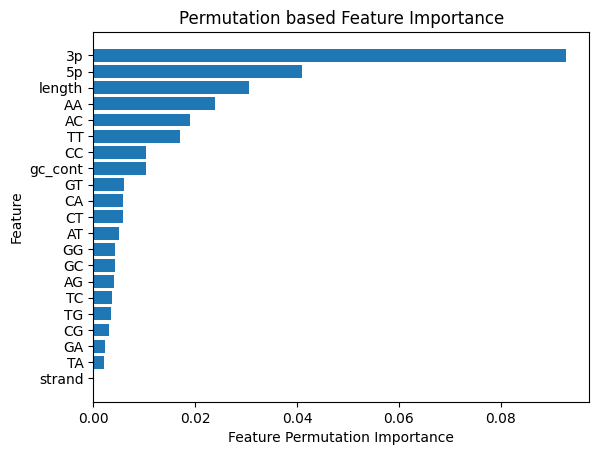

In [12]:
plt.rcParams.update({'font.size': 10})
fig4=plt.figure()
plt.barh(Xdt_train.columns[top_fidx3], perm_importance_t3.importances_mean[top_fidx3])
plt.xlabel("Feature Permutation Importance")
plt.ylabel('Feature')
plt.title('Permutation based Feature Importance')
fig4.savefig("Permutation_based_FI_dinuc_GPUR_set2.pdf")

In [10]:
# # #########################################################  Permutation Based Feature Importance ###################################################
with parallel_backend('threading',n_jobs=48 ):

    perm_importance = permutation_importance(rfc_gpur, Xdt_test, ydt_test, n_repeats=10, random_state=42, n_jobs=1)


In [11]:
sorted_idx = perm_importance.importances_mean.argsort()
top_fidx=sorted_idx[-22:]

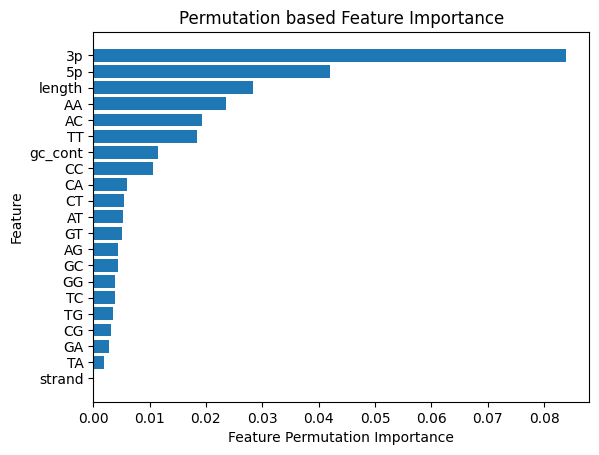

In [12]:
plt.rcParams.update({'font.size': 10})
fig4=plt.figure()
plt.barh(Xdt_train.columns[top_fidx], perm_importance.importances_mean[top_fidx])
plt.xlabel("Feature Permutation Importance")
plt.ylabel('Feature')
plt.title('Permutation based Feature Importance')
fig4.savefig("Permutation_based_FI_dinuc_GPUR_set2.png")


In [9]:
terafetures=['3p','5p','length','AA']

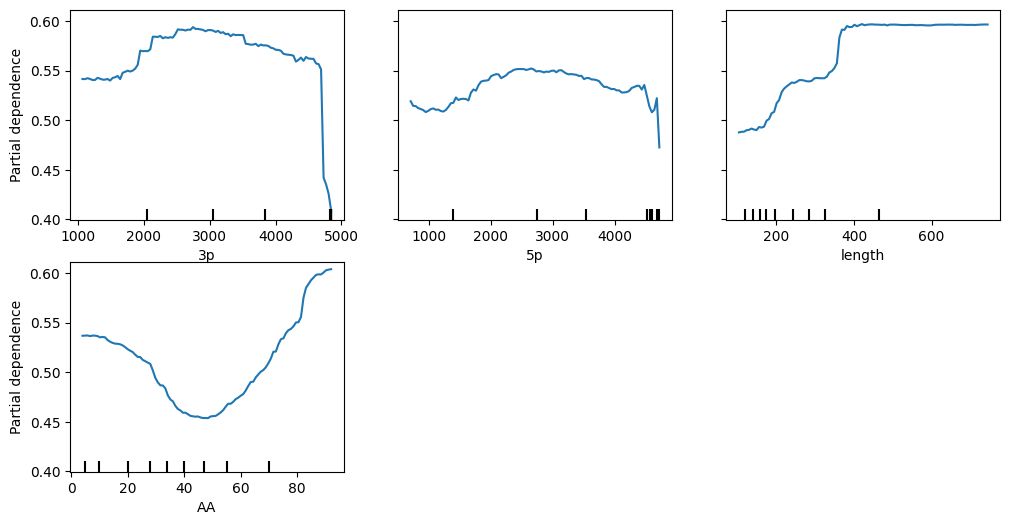

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

tree_disp = PartialDependenceDisplay.from_estimator(rfc_gpur,X=Xdt_test,features=terafetures, ax=ax,n_jobs=1)


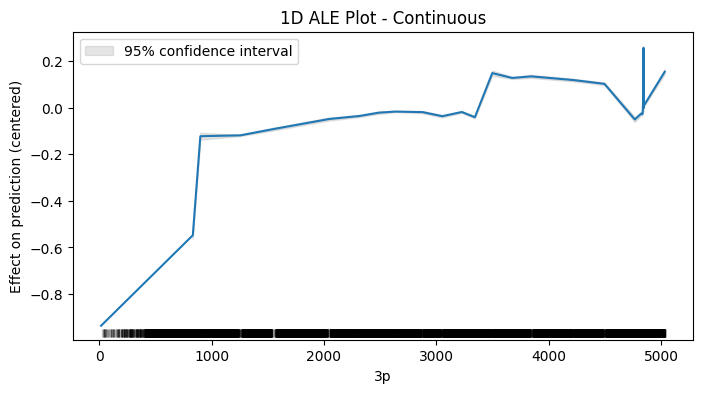

In [13]:
ale_eff_GPUR = ale(X=Xdt_test,model=rfc_gpur,feature=['3p'],feature_type='continuous',grid_size=50,include_CI=True,C=0.95) 